<a href="https://colab.research.google.com/github/Cesaraville/Housing-Price-Predictor/blob/main/Ames_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

In [72]:
df = pd.read_csv('/content/AmesHousing.csv')

In [73]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Data Cleaning

In [74]:
df.drop(['Order'], axis=1, inplace=True)
df.drop(2089, axis=0, inplace=True)

In [75]:
Categorical = df.select_dtypes(include='object')
Categorical.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [76]:
Numerical = df.select_dtypes(exclude='object')
Numerical.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [77]:
Num_categorical = df[['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold']]

In [78]:
Non_categorical = df[['Lot Area', 'Mas Vnr Area', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF']]

#'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val

# Null Values

In [79]:
# Categorical Data
Categorical = Categorical.fillna('Not Available')
Categorical = Categorical.astype(str)

#Numeric Categorical Data
Num_categorical = Num_categorical.fillna(0)
Num_categorical = Num_categorical.astype(str)

# Numerical Data
Non_categorical[['Gr Liv Area', 'Lot Area']] = Non_categorical[['Gr Liv Area', 'Lot Area']].fillna(0)
    #'Pool Area', 'Screen Porch', '3Ssn Porch',
Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr Area']] = Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr Area']].fillna(Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr Area']].mean())
Non_categorical = Non_categorical.astype(float)
    #'Misc Val', 'Enclosed Porch'

<ipython-input-79-e059bcc5240e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_categorical[['Gr Liv Area', 'Lot Area']] = Non_categorical[['Gr Liv Area', 'Lot Area']].fillna(0)
<ipython-input-79-e059bcc5240e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr Area']] = Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr Area']].fillna(Non_categorical[['Open Porch SF', 'Wood Deck SF', 'Garage Area', 'Mas Vnr

In [80]:
Non_categorical.isnull().sum()

,0
Lot Area,0
Mas Vnr Area,0
Gr Liv Area,0
Garage Area,0
Wood Deck SF,0
Open Porch SF,0


In [81]:
Num_categorical.isnull().sum()

,0
PID,0
MS SubClass,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
BsmtFin SF 1,0
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0


In [82]:
Categorical.isnull().sum()

,0
MS Zoning,0
Street,0
Alley,0
Lot Shape,0
Land Contour,0
Utilities,0
Lot Config,0
Land Slope,0
Neighborhood,0
Condition 1,0


# Numerical Data Manipulation

In [83]:
Non_categorical

,Lot Area,Mas Vnr Area,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF
0,31770.0,112.0,1656.0,528.0,210.0,62.0
1,11622.0,0.0,896.0,730.0,140.0,0.0
2,14267.0,108.0,1329.0,312.0,393.0,36.0
3,11160.0,0.0,2110.0,522.0,0.0,0.0
4,13830.0,0.0,1629.0,482.0,212.0,34.0
...,...,...,...,...,...,...
2925,7937.0,0.0,1003.0,588.0,120.0,0.0
2926,8885.0,0.0,902.0,484.0,164.0,0.0
2927,10441.0,0.0,970.0,0.0,80.0,32.0
2928,10010.0,0.0,1389.0,418.0,240.0,38.0


## Lot Area

<Axes: xlabel='Lot Area', ylabel='Count'>

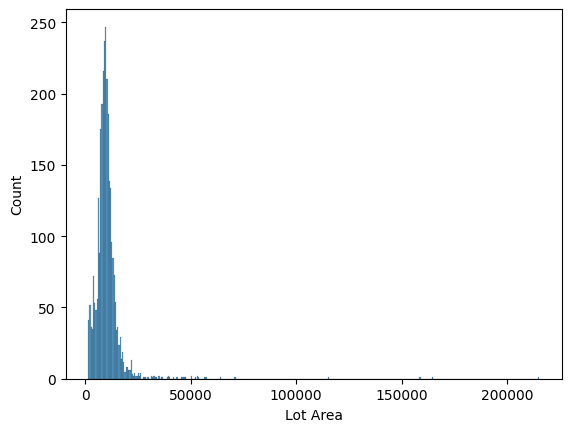

In [84]:
sns.histplot(Non_categorical['Lot Area'])

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

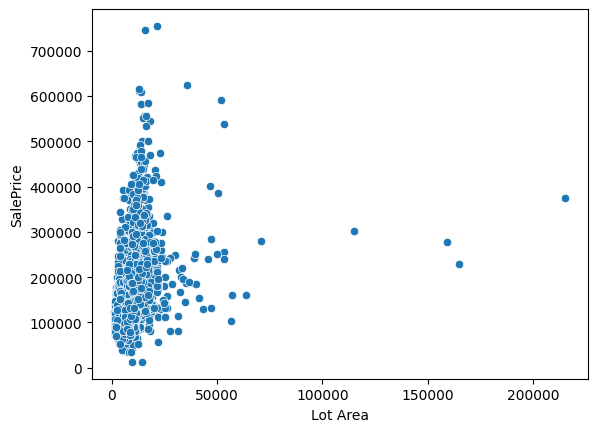

In [85]:
sns.scatterplot(x=Non_categorical['Lot Area'], y=df['SalePrice'])

In [86]:
Non_categorical['Lot Area'].describe()

,Lot Area
count,2929.000000
mean,10143.219870
std,7877.251229
min,1300.000000
25%,7440.000000
50%,9434.000000
75%,11553.000000
max,215245.000000


<Axes: xlabel='Lot Area', ylabel='Count'>

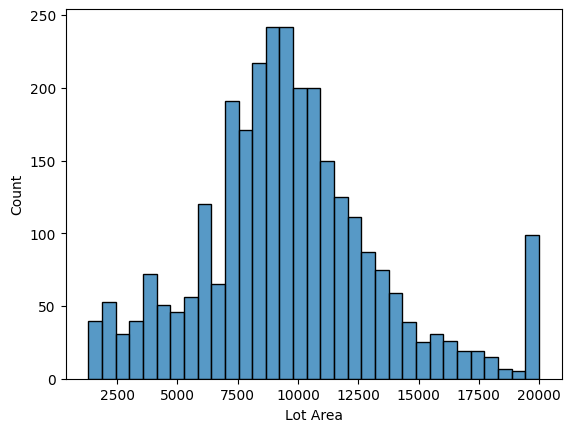

In [87]:
Non_categorical['Lot Area'] = Non_categorical['Lot Area'].clip(upper=20000)
sns.histplot(Non_categorical['Lot Area'])

## Mas Vnr Area

<Axes: xlabel='Mas Vnr Area', ylabel='Count'>

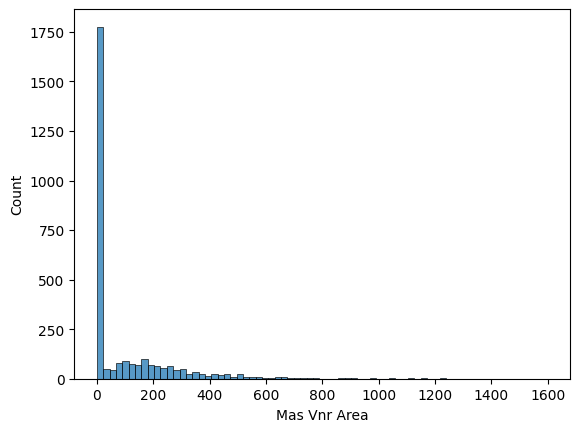

In [88]:
sns.histplot(Non_categorical['Mas Vnr Area'])

<Axes: xlabel='Mas Vnr Area', ylabel='SalePrice'>

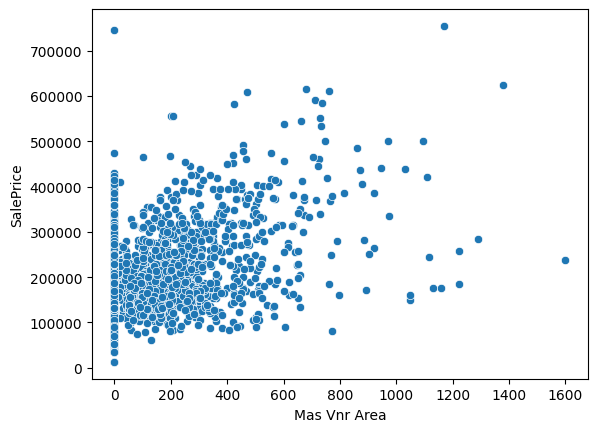

In [89]:
sns.scatterplot(x=Non_categorical['Mas Vnr Area'], y=df['SalePrice'])

In [90]:
Non_categorical['Mas Vnr Area'].describe()

,Mas Vnr Area
count,2929.000000
mean,101.931865
std,178.428506
min,0.000000
25%,0.000000
50%,0.000000
75%,163.000000
max,1600.000000


In [91]:
Non_categorical['Mas Vnr Area'] = np.log10(Non_categorical['Mas Vnr Area'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Mas Vnr Area', ylabel='Count'>

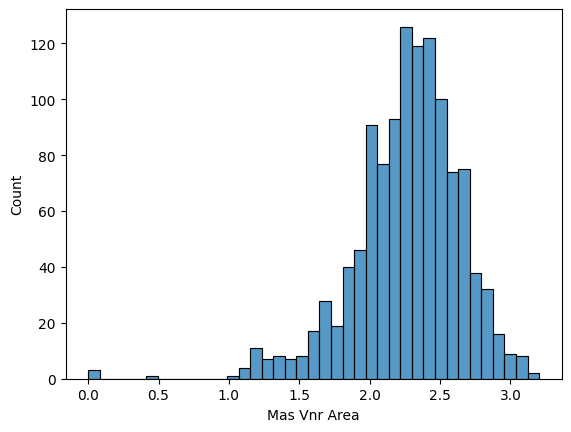

In [92]:
sns.histplot(Non_categorical['Mas Vnr Area'])

## Gr Liv Area

<Axes: xlabel='Gr Liv Area', ylabel='Count'>

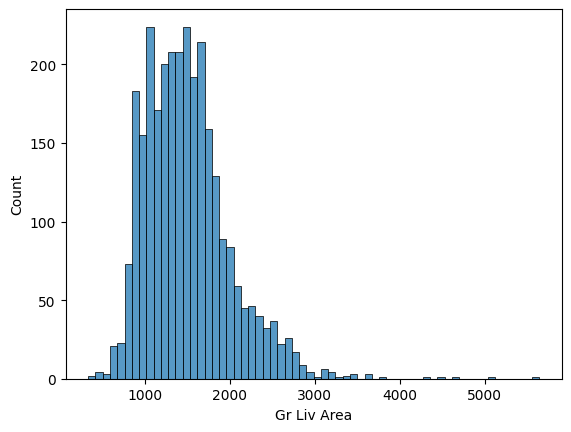

In [93]:
sns.histplot(Non_categorical['Gr Liv Area'])

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

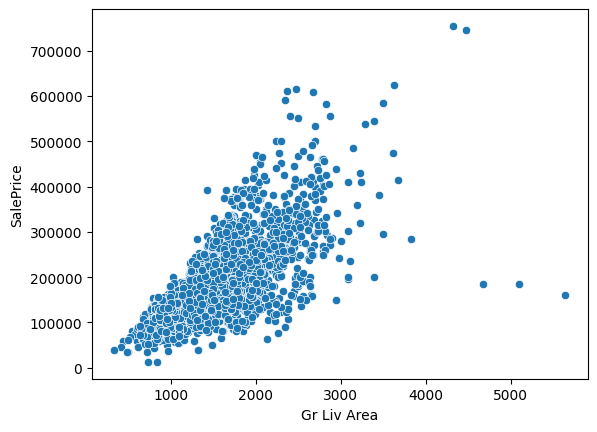

In [94]:
sns.scatterplot(x=Non_categorical['Gr Liv Area'], y=df['SalePrice'])

In [95]:
Non_categorical['Gr Liv Area'] = Non_categorical['Gr Liv Area'].clip(upper=3500)

<Axes: xlabel='Gr Liv Area', ylabel='Count'>

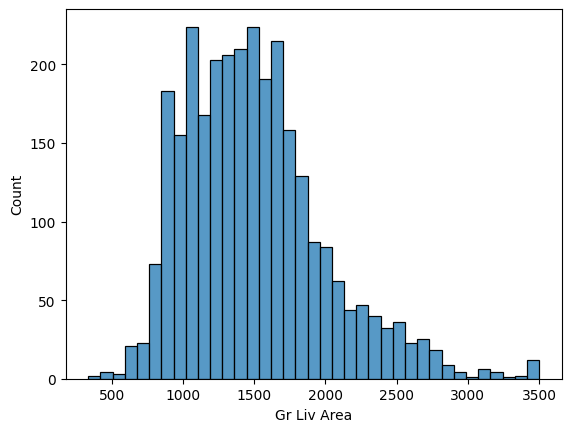

In [96]:
sns.histplot(Non_categorical['Gr Liv Area'])

## Garage Area

<Axes: xlabel='Garage Area', ylabel='Count'>

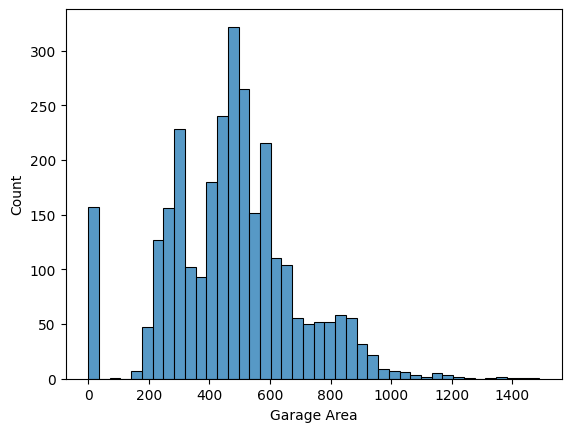

In [97]:
sns.histplot(Non_categorical['Garage Area'])

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

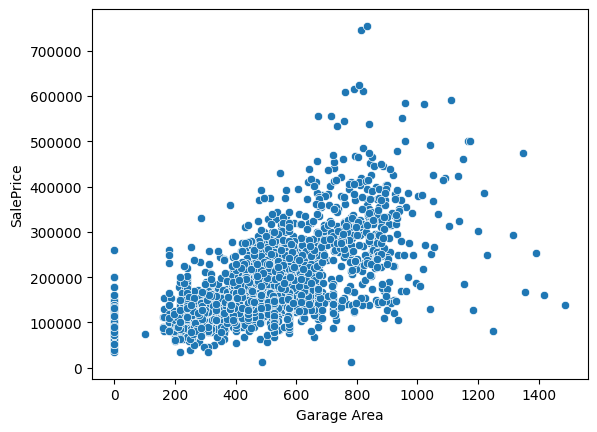

In [98]:
sns.scatterplot(x=Non_categorical['Garage Area'], y=df['SalePrice'])

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Non_categorical['Garage Area'] = scaler.fit_transform(Non_categorical[['Garage Area']])

<Axes: xlabel='Garage Area', ylabel='Count'>

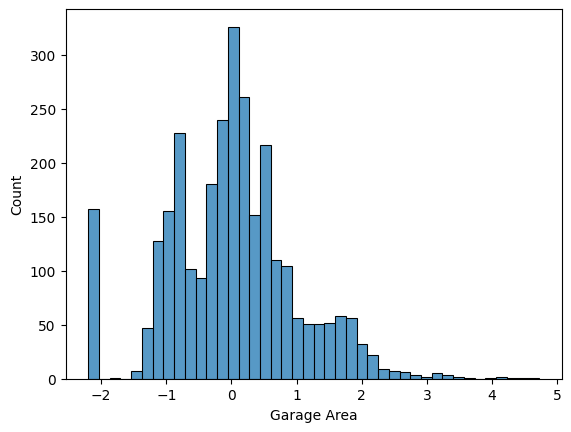

In [100]:
sns.histplot(Non_categorical['Garage Area'])

## Wood Deck SF

<Axes: xlabel='Wood Deck SF', ylabel='SalePrice'>

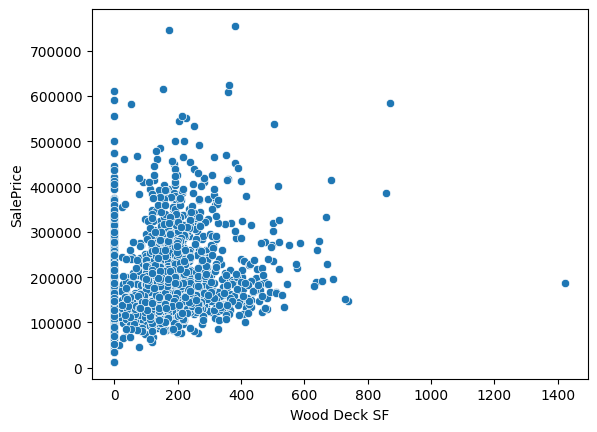

In [101]:
sns.scatterplot(x=Non_categorical['Wood Deck SF'], y=df['SalePrice'])

<Axes: xlabel='Wood Deck SF', ylabel='Count'>

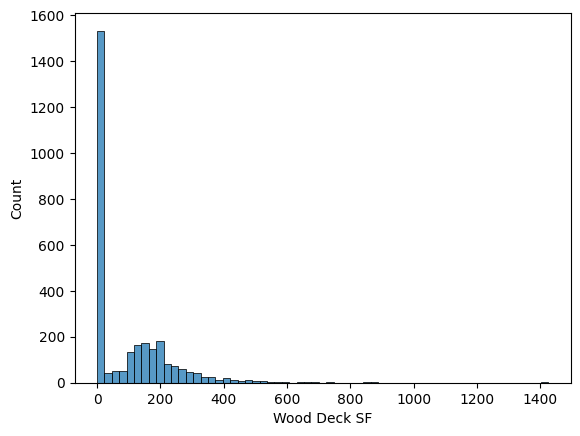

In [102]:
sns.histplot(Non_categorical['Wood Deck SF'])

In [103]:
Non_categorical['Wood Deck SF'] = np.log10(Non_categorical['Wood Deck SF'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Wood Deck SF', ylabel='Count'>

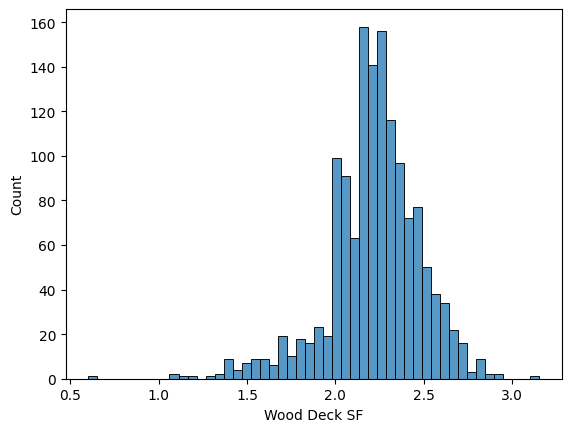

In [104]:
sns.histplot(Non_categorical['Wood Deck SF'])

## Open Porch SF

<Axes: xlabel='Open Porch SF', ylabel='SalePrice'>

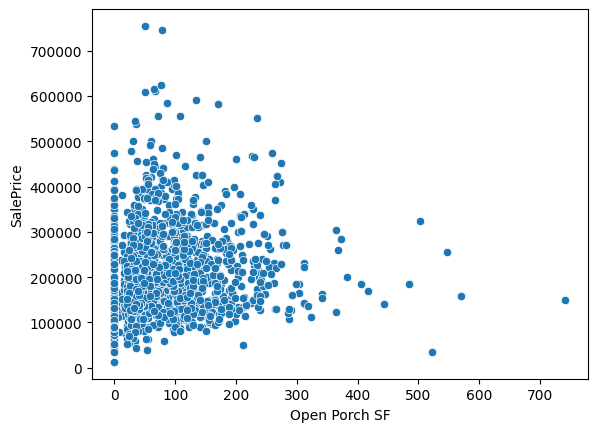

In [105]:
sns.scatterplot(x=Non_categorical['Open Porch SF'], y=df['SalePrice'])

<Axes: xlabel='Open Porch SF', ylabel='Count'>

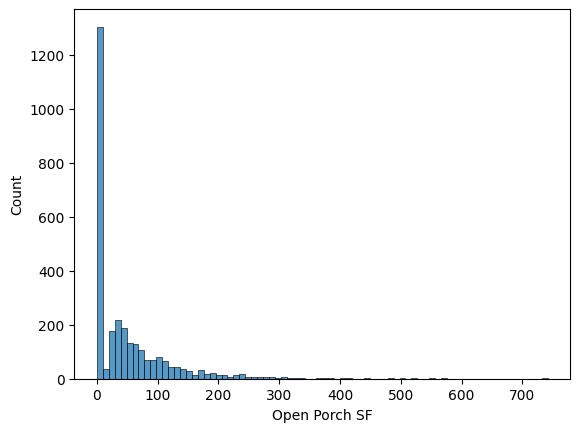

In [106]:
sns.histplot(Non_categorical['Open Porch SF'])

In [107]:
Non_categorical['Open Porch SF'] = np.log10(Non_categorical['Open Porch SF'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Open Porch SF', ylabel='Count'>

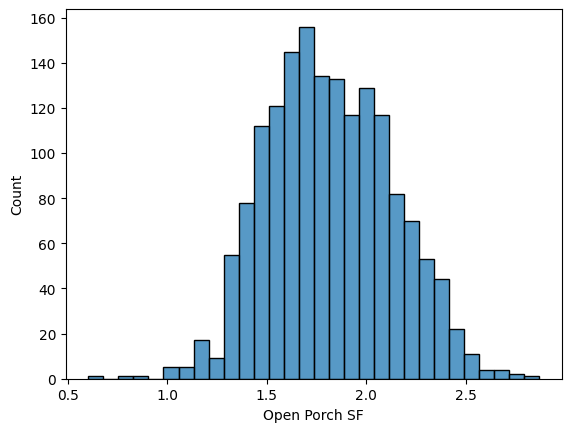

In [108]:
sns.histplot(Non_categorical['Open Porch SF'])

## Enclosed Porch

In [109]:
sns.scatterplot(x=Non_categorical['Enclosed Porch'], y=df['SalePrice'])

KeyError: 'Enclosed Porch'

In [ ]:
sns.histplot(Non_categorical['Enclosed Porch'])

In [ ]:
Non_categorical['Enclosed Porch'].sort_values(ascending=False)

In [ ]:
Non_categorical['Enclosed Porch'] = np.log10(Non_categorical['Enclosed Porch'])

In [ ]:
sns.histplot(Non_categorical['Enclosed Porch'])

## 3Ssn Porch

In [110]:
sns.scatterplot(x=Non_categorical['3Ssn Porch'], y=df['SalePrice'])

KeyError: '3Ssn Porch'

In [ ]:
sns.histplot(Non_categorical['3Ssn Porch'])

In [ ]:
max = Non_categorical['3Ssn Porch'].max()

bins = [-1, 1, 200, max]
labels = ['Zero', 'Low', 'High']
Non_categorical['3Ssn Porch'] = pd.cut(Non_categorical['3Ssn Porch'], bins=bins, labels=labels)

In [ ]:
Non_categorical['3Ssn Porch'] = Non_categorical['3Ssn Porch'].astype(str)

In [ ]:
Non_categorical['3Ssn Porch'].describe()

In [ ]:
Categorical = pd.concat([Categorical, Non_categorical['3Ssn Porch']], axis=1)

In [ ]:
Categorical.head()

## Screen Porch

In [111]:
sns.scatterplot(x=Non_categorical['Screen Porch'], y=df['SalePrice'])

KeyError: 'Screen Porch'

In [ ]:
sns.histplot(Non_categorical['Screen Porch'])

In [ ]:
max = Non_categorical['Screen Porch'].max()

bins = [-1, 1, 300, max]
labels = ['Zero', 'Low', 'High']
Non_categorical['Screen Porch'] = pd.cut(Non_categorical['Screen Porch'], bins=bins, labels=labels)

In [ ]:
Categorical = pd.concat([Categorical, Non_categorical['Screen Porch']], axis=1)

## Pool Area

In [112]:
sns.scatterplot(x=Non_categorical['Pool Area'], y=df['SalePrice'])

KeyError: 'Pool Area'

In [ ]:
sns.histplot(Non_categorical['Pool Area'])

In [ ]:
max = Non_categorical['Pool Area'].max()

bins = [-1, 1, 400, max]
labels = ['Zero', 'Low', 'High']
Non_categorical['Pool Area'] = pd.cut(Non_categorical['Pool Area'], bins=bins, labels=labels)

In [ ]:
Categorical = pd.concat([Categorical, Non_categorical['Pool Area']], axis=1)

## Misc Val

In [113]:
sns.scatterplot(x=Non_categorical['Misc Val'], y=df['SalePrice'])

KeyError: 'Misc Val'

In [ ]:
sns.histplot(Non_categorical['Misc Val'])

In [ ]:
Non_categorical['Misc Val'].sort_values(ascending=False)

In [ ]:
Non_categorical['Misc Val'] = np.log10(Non_categorical['Misc Val'])

In [ ]:
sns.histplot(Non_categorical['Misc Val'])

# One-Hot Encoder

In [114]:
!pip install --upgrade scikit-learn

In [115]:
!pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [116]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


Categorical_df = pd.DataFrame(Categorical)
Categorical_df = Categorical_df.replace([np.inf, -np.inf], 1e10)
Categorical = encoder.fit_transform(Categorical_df)

Non_categorical = Non_categorical.replace([np.inf, -np.inf], 1e10)
Non_categorical = encoder.fit_transform(Non_categorical).astype(np.float32)

# Y Variable

<Axes: xlabel='SalePrice', ylabel='None'>

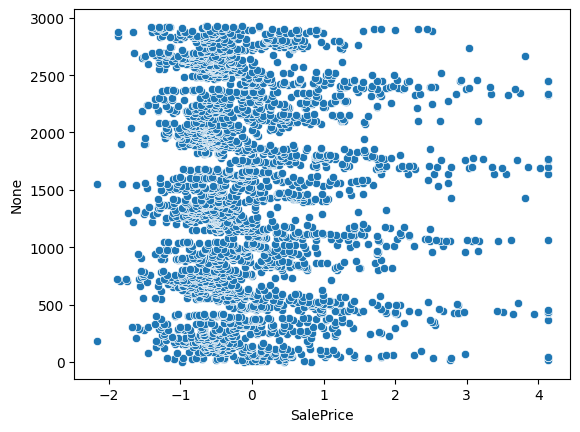

In [182]:
sns.scatterplot(x=df['SalePrice'], y=df.index)

<Axes: xlabel='SalePrice', ylabel='Count'>

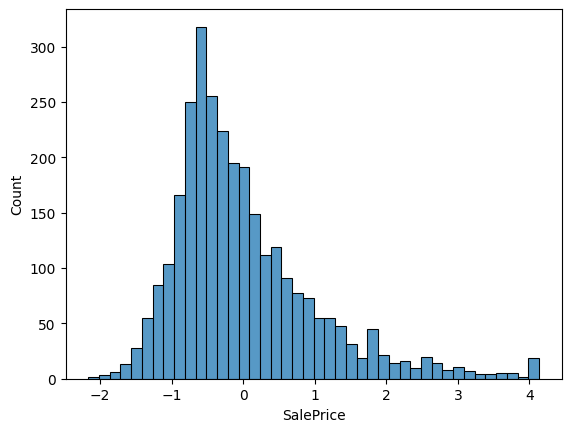

In [183]:
sns.histplot(df['SalePrice'])

In [184]:
df['SalePrice']=df['SalePrice'].clip(upper=500000)

<Axes: xlabel='SalePrice', ylabel='Count'>

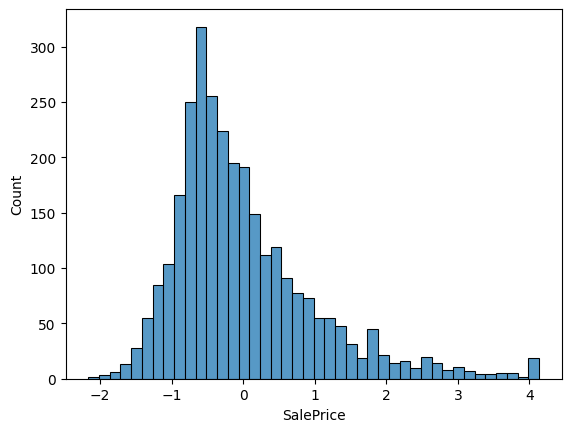

In [185]:
sns.histplot(df['SalePrice'])

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['SalePrice'] = scaler.fit_transform(df[['SalePrice']].to_numpy().reshape(-1, 1))

# Data Split

In [201]:
df2 = pd.DataFrame(Non_categorical)
# Convert Categorical and Num_categorical to DataFrames before concatenation
Categorical_df = pd.DataFrame(Categorical)
Num_categorical_df = pd.DataFrame(Num_categorical)
df2 = pd.concat([df2, Categorical_df, Num_categorical_df, df[['SalePrice']]], axis=1)
# This assumes the dataframes have the same number of rows. If not, adjust accordingly.

In [202]:
x = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

In [203]:
x.shape

(2930, 5146)

In [204]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,0.000341,0.000341,0.000341,0.000683,0.000341,0.000341,0.000341,0.000341,0.000341,0.000683,...,0.081598,0.002390,0.000341,0.865483,0.064869,0.004097,0.008194,0.015705,0.823489,0.083646
std,0.018477,0.018477,0.018477,0.026127,0.018477,0.018477,0.018477,0.018477,0.018477,0.026127,...,0.273798,0.048836,0.018477,0.341265,0.246336,0.063887,0.090164,0.124353,0.381319,0.276904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

## Data Cleaning pt 2

In [206]:
# Replace 'object' with the actual dtype of the problematic columns if known.
x_train = x_train.select_dtypes(exclude=['object'])
x_val = x_val.select_dtypes(exclude=['object'])

# Now apply np.isnan
print(np.isnan(x_train).sum().sum(), np.isnan(y_train).sum()) #.sum() again to get the total count
print(np.isnan(x_val).sum().sum(), np.isnan(y_val).sum())     #.sum() again to get the total count

5121 1
0 0


In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [208]:
x_train[np.isinf(x_train)] = np.nan
x_val[np.isinf(x_val)] = np.nan

# Replace nan with column-wise mean
# Loop through each column
for i in range(x_train.shape[1]):
    col_mean = np.nanmean(x_train[:, i])
    x_train[np.isnan(x_train[:, i]), i] = col_mean
    x_val[np.isnan(x_val[:, i]), i] = col_mean

In [209]:
import tensorflow as tf
tf.debugging.enable_check_numerics()

In [210]:
nan_index = np.where(np.isnan(y_train))[0]

x_train = np.delete(x_train, nan_index, axis=0)
y_train = np.delete(y_train, nan_index, axis=0)

In [211]:
print("y_train NaNs:", np.isnan(y_train).sum())
print("y_train Infs:", np.isinf(y_train).sum())
print("y_val NaNs:", np.isnan(y_val).sum())
print("y_val Infs:", np.isinf(y_val).sum())

y_train NaNs: 0
y_train Infs: 0
y_val NaNs: 0
y_val Infs: 0


In [212]:
x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

In [213]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=1)
#x_train = poly.fit_transform(x_train)
#x_val = poly.transform(x_val)

In [214]:
x_train.shape

(2343, 5121)

#Neural Network

In [215]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

model = keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(x_train, y_train, epochs=20, batch_size=30, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 6.4892 - mae: 1.6111 - val_loss: 19.5427 - val_mae: 3.7761
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.2894 - mae: 2.0966 - val_loss: 3.1249 - val_mae: 1.4608
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.3760 - mae: 0.8509 - val_loss: 1.4568 - val_mae: 0.9125
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 1.4052 - mae: 0.7975 - val_loss: 1.0117 - val_mae: 0.8089
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4911 - mae: 0.5109 - val_loss: 0.7203 - val_mae: 0.6832
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2408 - mae: 0.3601 - val_loss: 0.6030 - val_mae: 0.6385
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1828 - mae: 0.2994 - val_loss: 0.5496 - val_mae: 0.5972
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.1356 - mae: 0.2605 - val_loss: 0.5217 - val_mae: 0.5915
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.10

In [223]:
x_train = x_train.loc[:, ~x_train.columns.duplicated()]
x_test = x_test.loc[:, ~x_test.columns.duplicated()]

x_test_aligned = x_test.reindex(columns=x_train.columns, fill_value=0)

y_pred_scaled = model.predict(x_test_aligned)
y_pred = scaler.inverse_transform(y_pred_scaled)

Exception ignored in: <function _xla_gc_callback at 0x7e23d68528e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
